In [2]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrend library and keyword define

In [185]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "cloud computing"

# Data Request

In [188]:
pytrends.build_payload([keyword], cat = 0, timeframe ='today 12-m', geo ='', gprop ='')

# Country wise intreset

In [191]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

C:\Users\Upendra Tiwari\AppData\Local\Temp\ipykernel_4028\1548046019.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




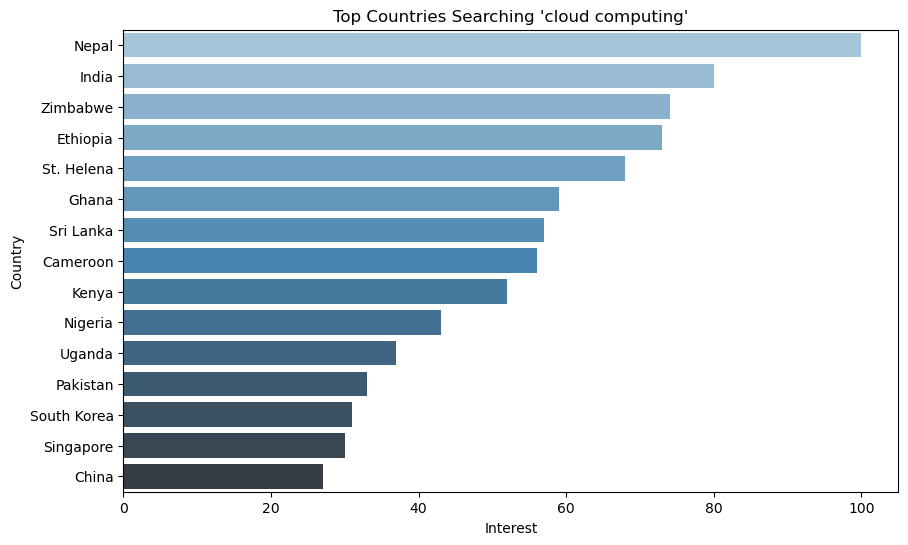

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword], y=region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# world map 

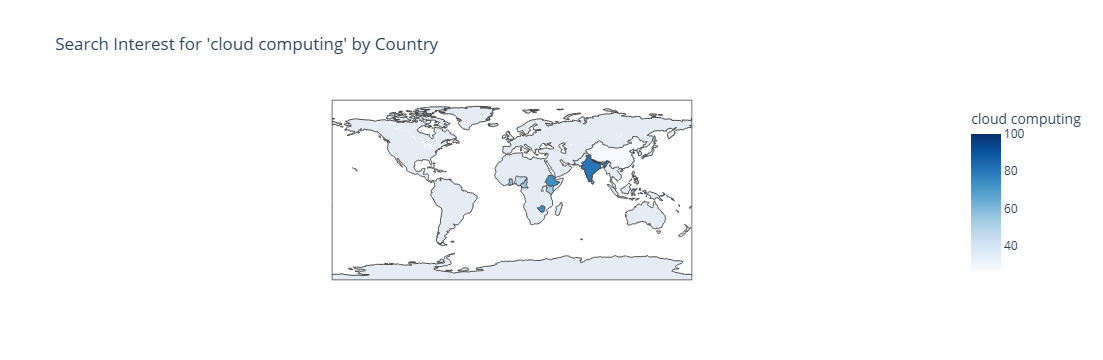

In [195]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data, 
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

# Time wise interest

In [197]:
time_df = pytrends.interest_over_time()

C:\Users\Upendra Tiwari\anaconda3\Anaconda33\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



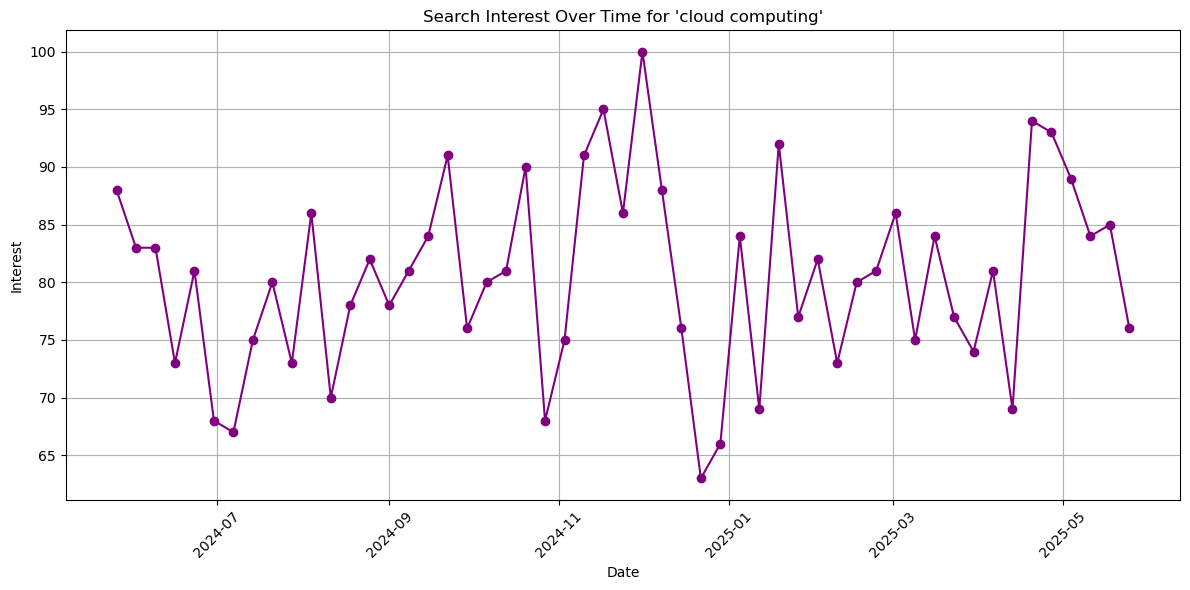

In [199]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# multiple keywords compare

In [201]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\Upendra Tiwari\anaconda3\Anaconda33\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



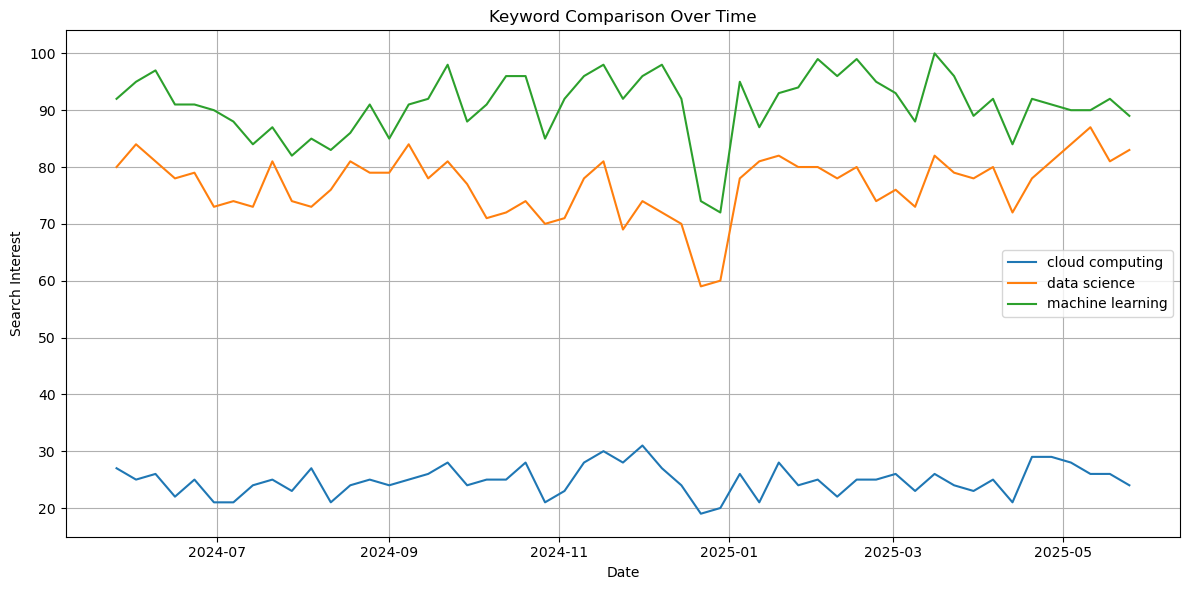

In [203]:
 compare_df = pytrends.interest_over_time()
 plt.figure(figsize=(12,6))
 for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)
 plt.title("Keyword Comparison Over Time")
 plt.xlabel("Date")
 plt.ylabel("Search Interest")
 plt.legend()
 plt.grid(True)
 plt.tight_layout()
 plt.show()

# Suppose you are working in a data-driven job role, and you have to answer all these questions.
 1) First, write a code where, by changing just the keyword, we can search for multiple things.
 2) Top 15 countries where the keywords are searched the most, and also create visual representation of it.
 3) A world map needs to be plotted showing the countries that search the keyword the most.
 4) We need to extract the time-wise interest of the keyword — how it trended in different years.
 5) Compare related keywords and plot the graph.